<a href="https://colab.research.google.com/github/fatin3ihsan/50-mini-projects/blob/main/Used_Car_Selling_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from google.colab import drive
drive.mount('/content/drive')

file_path = r'/content/drive/My Drive/Colab Notebooks/Used Car Selling Price/data.csv'
df = pd.read_csv(file_path)


Mounted at /content/drive


In [ ]:
headers = ["symboling", "normalized-losses", "make",
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size",
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
# converting mpg to L/100
df['city-mpg'] = 235 / df['city-mpg']
df.rename(columns = {'city-mpg' : 'City-L/100km'}, inplace = True)
# removing "?" from price and make int type
df = df[df.price != '?']
df['price'] = df['price'].astype(int)
# normalizing data
df["length"] = df["length"] / df["length"].max()
df["width"] = df['width'] / df["width"].max()
df["height"] = df['height'] / df["height"].max()
# binning grouping values
bins = np.linspace(min(df['price']), max(df['price']), 4)
group_names = ['Low', 'Medium', "High"]
df['price-binned'] = pd.cut(df['price'], bins,
                              labels = group_names,
                              include_lowest = True)


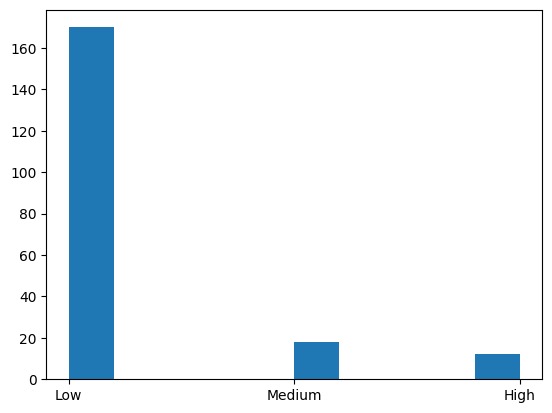

In [ ]:
plt.hist(df['price-binned'])
plt.show()

In [ ]:
print(df.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          1                 ?  alfa-romero       gas        std          two   
2          2               164         audi       gas        std         four   
3          2               164         audi       gas        std         four   
4          2                 ?         audi       gas        std          two   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
0  convertible          rwd           front        88.6  ...         mpfi   
1    hatchback          rwd           front        94.5  ...         mpfi   
2        sedan          fwd           front        99.8  ...         mpfi   
3        sedan          4wd           front        99.4  ...         mpfi   
4        sedan          fwd           front        99.8  ...         mpfi   

   bore  stroke  compression-ratio horsepower peak

In [ ]:
pd.get_dummies(df['fuel-type']).head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,City-L/100km,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,10.170100,9.937914,30.705000,13205.690000
std,1.248557,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,4.014163,2.539415,6.827227,7966.982558
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,8.575000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,9.000000,9.791667,30.000000,10270.000000
75%,2.000000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,9.400000,12.368421,34.000000,16500.750000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff82d9cc880>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff82d9cf880>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff82d9cdab0>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff82d9ccbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff82d9cf370>],
 'means': []}

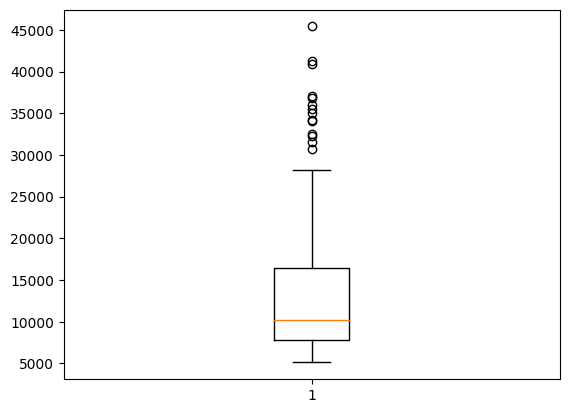

In [ ]:
plt.boxplot(df['price'])

<Axes: xlabel='drive-wheels', ylabel='price'>

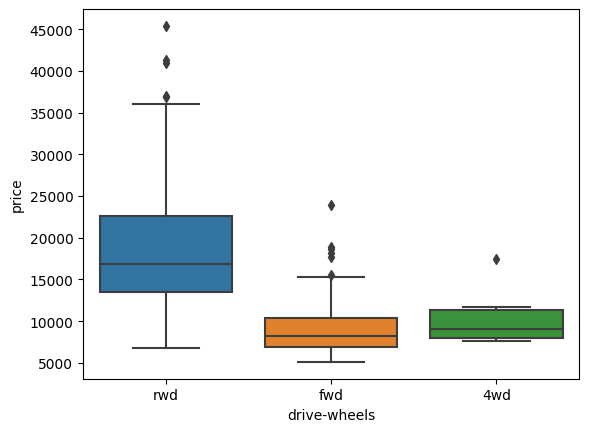

In [ ]:
sns.boxplot(x ='drive-wheels', y ='price', data = df)

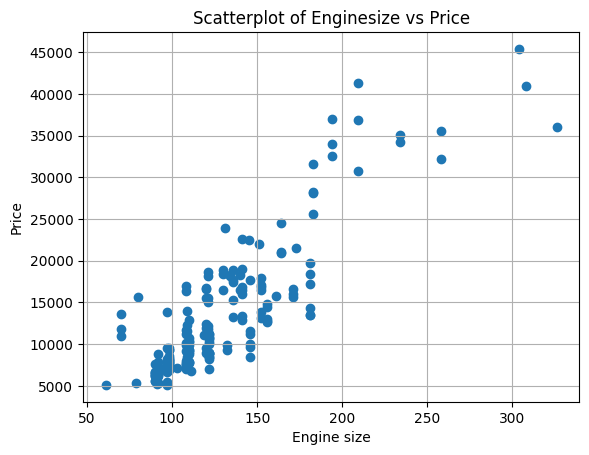

In [ ]:
plt.scatter(df['engine-size'], df['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [ ]:
# Grouping Data
test = df[['drive-wheels', 'body-style', 'price']]
data_group =test.groupby(['drive-wheels', 'body-style'], as_index= False).mean()
data_group

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


In [ ]:
#data pivot
data_pivot = data_group.pivot(index = 'drive-wheels', columns = 'body-style')
data_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd             11595.00   8249.000000   8396.387755   9811.800000   
rwd             26563.25  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

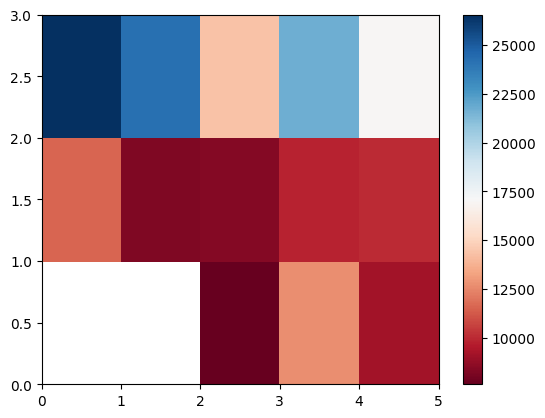

In [ ]:
#heat map
plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()

In [ ]:
#data annova
data_annova = df[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(
                             grouped_annova.get_group('honda')['price'],
                             grouped_annova.get_group('subaru')['price']
                                    )
print(annova_results_l)

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


(0.0, 53434.78824859405)

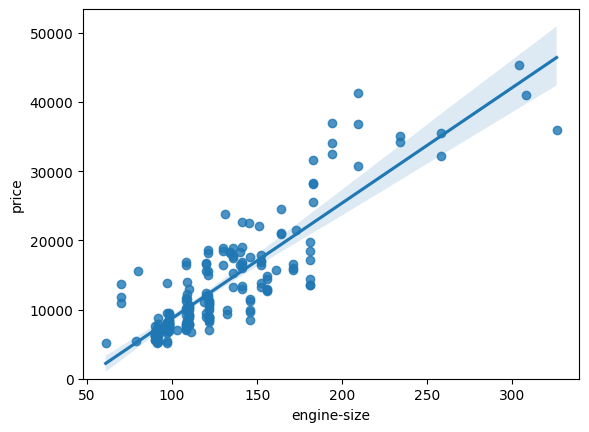

In [ ]:
sns.regplot(x ='engine-size', y ='price', data = df)
plt.ylim(0, )